<a href="https://colab.research.google.com/github/arielwendichansky/SoundFlow/blob/main/talias_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine.data import *
from plotnine import ggplot, aes, geom_point, theme_minimal
import plotly.graph_objects as go

In [89]:
df = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [104]:
df.drop(["key", "in_shazam_charts"],axis = 1, inplace = True)

In [105]:
df.columns = ['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode',
       'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [75]:
df["streams"] = pd.to_numeric(df["streams"],errors='coerce')

In [76]:
df['released_year'] = pd.to_datetime(df['released_year'], format='%Y')
df['released_month'] = pd.to_datetime(df['released_month'], format='%m')
df['released_day'] = pd.to_datetime(df['released_day'], format='%d')

In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [14]:
df.shape

(953, 24)

In [27]:
unique_names = df["artist_name"].unique()
unique_names.shape

(645,)

In [30]:
all_artists = df["artist_name"].str.split(', ').explode().unique()

In [31]:
all_artists.shape

(699,)

In [38]:
all_artists[600:]

array(['BIGBANG', 'Blxst', 'Amanda Reifer', 'Sampha', 'Roddy Ricch',
       'Tony Dize', 'Buscabulla', 'Taylour Paige', 'Sam Dew',
       'The Marï¿½ï', 'Ghostface Killah', 'Summer Walker',
       'Polima WestCoast', 'Panic! At The Disco', 'Tanna Leone', 'PSY',
       'Benson Boone', 'KALUSH', 'Luciano', 'Shae Gill', 'Ali Sethi',
       'Beth Gibbons', 'MNEK', 'Ugly Dray', 'Tesla Jnr', 'Jessi',
       'Chanel', 'Leah Kate', 'Sam Ryder', 'HA SUNG WOON',
       'The Goo Goo Dolls', 'Kevin Kaarl', 'Suki Waterhouse',
       'Chris Jedi', 'Musical Youth', 'Villano Antillano', 'BYOR',
       'Imanbek', '347aidan', 'Paloma Faith', 'Childish Gambino',
       'Ella Henderson', 'Becky Hill', 'Sidhu Moose Wala',
       'Keisya Levronka', 'Victor Cibrian', 'Metallica', 'Paloma Mami',
       'Yung Gravy', 'Lasso', 'Nayeon', 'Schï¿½ï¿½rze', 'DJ R',
       "Guns N' Roses", 'Burna Boy', 'Cardi B', 'L7nnon',
       'DJ Biel do Furduncinho', 'Bianca', 'Nessa Barrett', 'LF System',
       'Mc Vitin Da Ig

In [67]:
column_list = df.select_dtypes(include =['number', 'float', 'integer'])
correlation_matrix = column_list.corr()

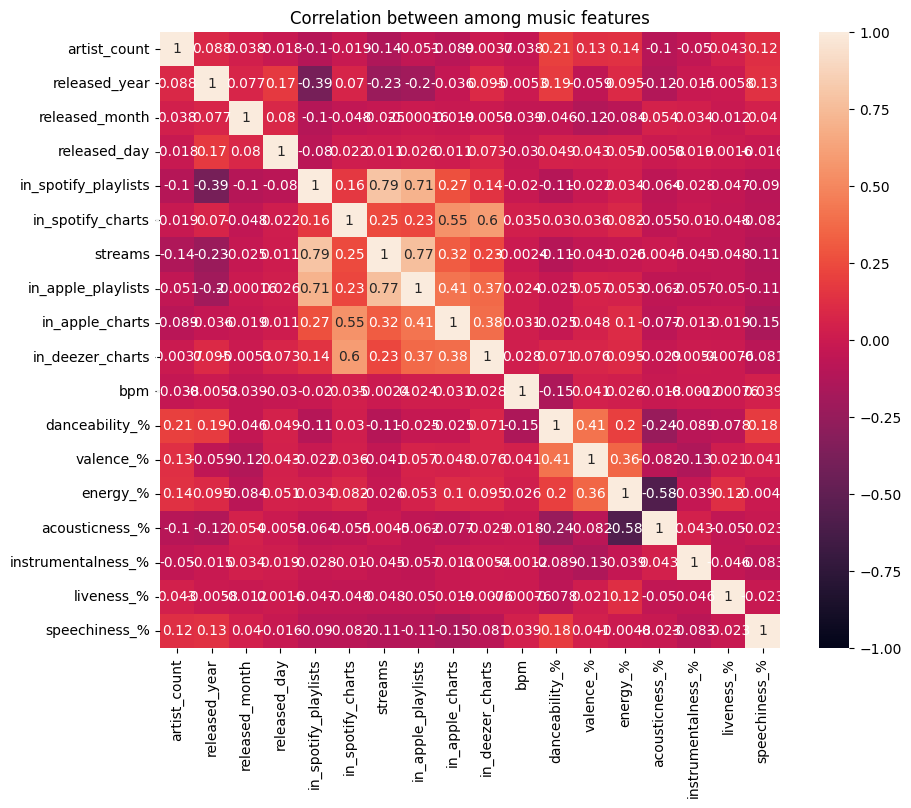

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title("Correlation between among music features")
plt.show()

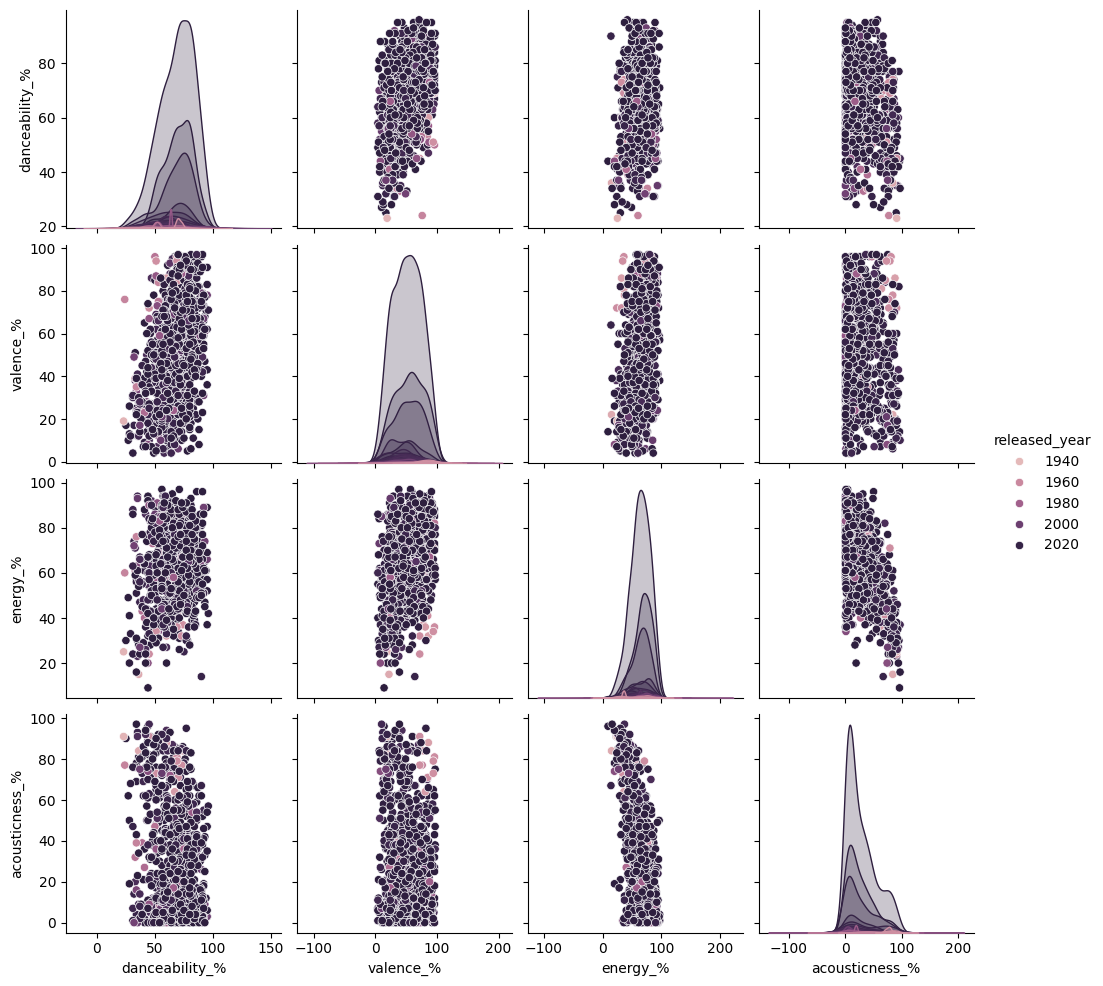

In [12]:
sns.pairplot(df_sub, hue="released_year", markers ="o")

In [39]:
df_country = pd.read_json("artist_country.json")

In [41]:

df_country.head()

,artist_name,country
0,Latto,United States
1,Jung Kook,South Korea
2,Myke Towers,Puerto Rico
3,Olivia Rodrigo,United States
4,Taylor Swift,United States


In [43]:
country_count = df_country.groupby("country")["artist_name"].count().reset_index(name = "count")
country_count

,country,count
0,Argentina,17
1,Armenia,1
2,Australia,10
3,Austria,1
4,Barbados,2
5,Belgium,3
6,Brazil,38
7,Cameroon,1
8,Canada,15
9,Chile,5


In [44]:
fig = px.choropleth(country_count,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='artist distribution by country')
fig.show()

In [48]:
fig = px.choropleth(country_count,
                    locations='country',
                    locationmode='country names',
                    color = 'count',
                    color_continuous_scale = 'Viridis',
                    range_color = (0,country_count['count'].max()),
                    title = "Artist Heritage",
                    hover_name = 'country',
                    hover_data = 'count',
                    labels = {'country': 'count'})
fig.update_geos(projection_type = "orthographic", showcoastlines = True, coastlinecolor = 'Black', showland = True, landcolor = 'LightGreen', showocean = True)
fig.show()

**DATE ANALYSIS**

In [92]:
df_dates = df.groupby(["released_year", "released_month", "released_day"])["track_name"].count().reset_index().sort_values(by = "track_name", ascending = False)
df_dates

,released_year,released_month,released_day,track_name
314,2022,5,6,27
317,2022,5,13,23
259,2022,1,7,19
393,2022,12,9,17
377,2022,10,21,17
...,...,...,...,...
163,2020,1,1,1
161,2019,12,6,1
160,2019,11,29,1
159,2019,11,17,1


In [93]:
df_dates = df.groupby(["released_year", "released_month"])["track_name"].count().reset_index().sort_values(by = "track_name", ascending = False)
df_dates

,released_year,released_month,track_name
147,2022,5,75
154,2022,12,48
143,2022,1,37
157,2023,3,37
152,2022,10,37
...,...,...,...
47,2003,3,1
46,2002,8,1
43,2000,11,1
42,2000,10,1


In [94]:
df_dates = df.groupby(["released_month"])["track_name"].count().reset_index().sort_values(by = "track_name", ascending = False)
df_dates

,released_month,track_name
0,1,134
4,5,128
2,3,86
5,6,86
10,11,80
11,12,75
9,10,73
3,4,66
6,7,62
1,2,61


In [95]:
df_dates = df.groupby(["released_month"])["track_name"].count().reset_index()
df_dates

,released_month,track_name
0,1,134
1,2,61
2,3,86
3,4,66
4,5,128
5,6,86
6,7,62
7,8,46
8,9,56
9,10,73


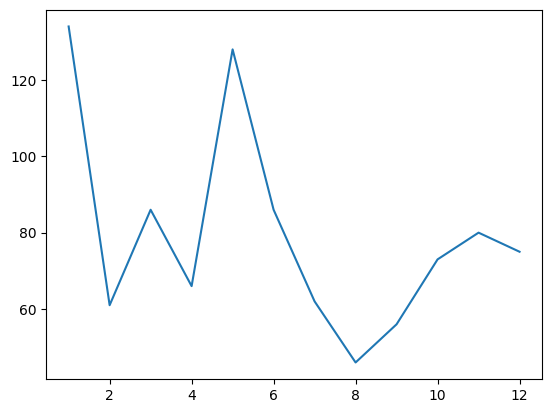

In [96]:
plt.plot(df_dates.released_month,df_dates.track_name)

In [100]:
df_date_year = df.groupby("released_year")["track_name"].count().reset_index()
df_date_year

,released_year,track_name
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1


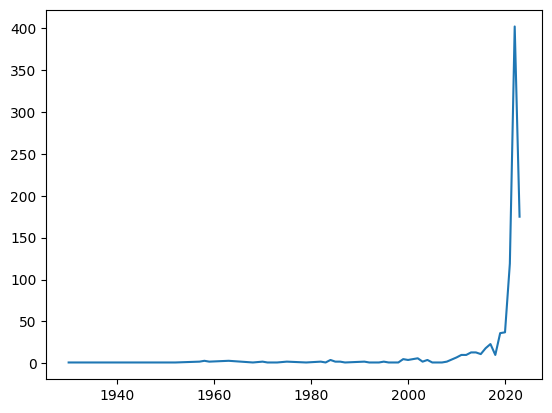

In [101]:
plt.plot(df_date_year.released_year, df_date_year.track_name)
plt.show()

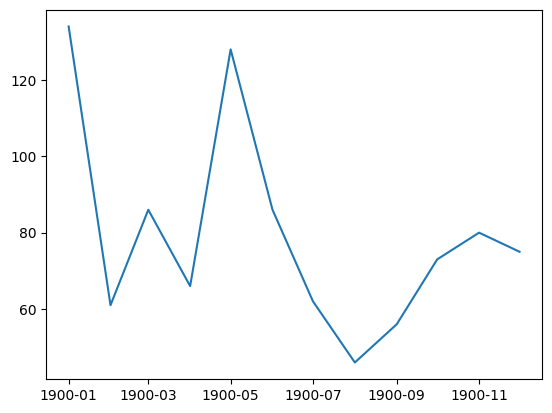

In [85]:
plt.plot(df_date_month.released_month, df_date_month.track_name)
plt.show()

In [123]:
track_per_df= df.groupby("artist_name")["track_name"].count().reset_index(name = "count").sort_values(by = "count", ascending = False).head(5)

In [119]:
track_per_df


artist_name
Taylor Swift    34
The Weeknd      22
SZA             19
Bad Bunny       19
Harry Styles    17
Name: track_name, dtype: int64

Text(0, 0.5, 'Frequency')

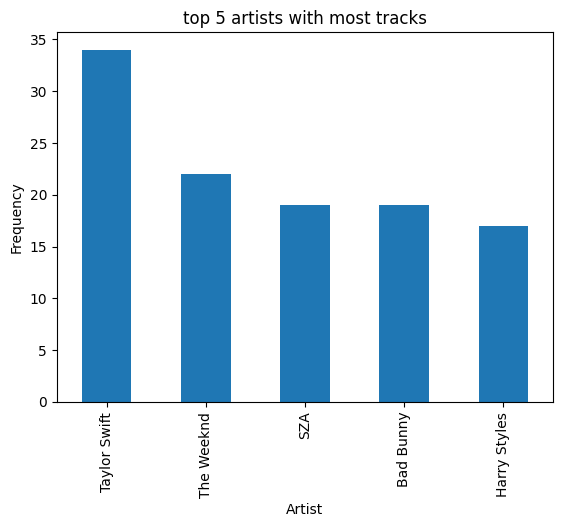

In [120]:
track_per_df.plot(kind = 'bar')
plt.title(f'top 5 artists with most tracks')
plt.xlabel('Artist')
plt.ylabel('Frequency')



In [124]:
fig = px.bar(track_per_df, x='artist_name', y="count", color ="count")
fig.show()

In [140]:
xlen = df.shape[0:1]
xlen

(953,)

In [141]:
len(df)

953

In [133]:
df.shape

(953, 22)